In [7]:
def test(p1,p2,epsilon):
    for testVal in np.arange(0.5,10,0.5):
        a = p2.pdf(testVal)
        b1 = p1.pdf(testVal)
        b2 = np.exp(epsilon)
        b = b1*b2

#Differential Privacy

##Motivation

Quoting Paul Ohm:

>In the 1990s, an insurance company released 'anonymised' health data on **all state employees** in Massachusetts. The Governor of Massachusetts, said that GIC had protected patient privacy by deleting identifiers. Latanya Sweeney (a postgrad researcher) showed otherwise.

How it was done:
 - She knew that Governor Weld resided in Cambridge, Massachusetts.
 - Used the voter rolls from the city of Cambridge (contains the name, address, ZIP code, birth date, and sex of every voter).
 - By combining this data with the GIC records, Sweeney found Governor Weld with ease.
   - Only six people in Cambridge shared his birth date (contained in the 'anonymised' data)
   - Only three of them men (also in the data)
   - Of them, only he lived in his ZIP code (also in the data)

(An example of a linkage attack)

<div class=small>
[1] http://arstechnica.com/tech-policy/2009/09/your-secrets-live-online-in-databases-of-ruin/ 
</div>

##Detour: Census Data

The ONS provide a wide array of tables, providing linkage between intriguing combinations of parameters [2].

The data, at the smallest scale, is split into Output Areas. Usually consist of 200-300 people. This is my OA:

|  | Males |  |  |  |  |  |  | Females |  |  |  |  |  |  |
|------------|---------|----------|----------|----------|----------|----------|-------------|---------|----------|----------|----------|----------|----------|-------------|
|  | 0 to 15 | 16 to 24 | 25 to 34 | 35 to 49 | 50 to 64 | 65 to 74 | 75 and over | 0 to 15 | 16 to 24 | 25 to 34 | 35 to 49 | 50 to 64 | 65 to 74 | 75 and over |
| Christian | 1 | 20 | 11 | 8 | 2 | 0 | 1 | 0 | 15 | 14 | 2 | 0 | 1 | 0 |
| Buddhist | 0 | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| Hindu | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| Jewish | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| Muslim | 3 | 6 | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 2 | 0 | 0 | 0 |
| Sikh | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| Other | 0 | 0 | 1 | 0 | 0 | 0 | 0 | 2 | 0 | 1 | 0 | 0 | 0 | 0 |
| None | 5 | 35 | 34 | 12 | 6 | 1 | 0 | 4 | 18 | 22 | 7 | 2 | 1 | 0 |
| Not Stated | 1 | 5 | 1 | 4 | 0 | 0 | 0 | 1 | 0 | 2 | 0 | 1 | 0 | 0 |

<br />
<br />
<br />
<br />
<br />

###Is this private?

<img src="beardy-old-man.jpg" align=right width=250px> 
Clearly, it appears we could identify individuals...

There's one male over 75 (pictured) that I've seen lives in my area. Although he's a very private person we can work out his religion by looking at the table. The only male over 75 in my OA is Christian.

<small>Disclosure: Because of swapping (below) this is a fictious example.</small>

####Swapping

The ONS obviously have thought of this, and **swap house-holds** between output areas.

The ONS won't reveal how many swaps occur, but it depends on the amount of imputation in an area, and how unique a household is (outliers are more likely to be swapped, as they're more identifiable).

Today I'll look briefly at **differential privacy**, a framework for ensuring a certain level of anonymity.

<br /><br /><br /><br /><br /><br /><br />

##Differential Privacy

> differential privacy: "maximize the accuracy of queries from statistical databases while minimizing the chances of identifying its records." (wikipedia)

> differential privacy: "a promise by a curator to a data subject that they will not be affected by being included, regardless what other sources of data are available" (privacy book, The Algorithmic Foundations of Differential Privacy - Cynthia Dwork & Aaron Roth).

This brings in the idea of a *linkage attack*: combining data sources.

(The health insurance example at the start was an example of this, but there are many others. E.g. an netflix user was identified by linking the anonymous netflix data with the IMDB data).
<br /><br /><br /><br /><br /><br /><br />
###Example (coin flip)

<img src="diff_priv_coin_small.png" align=right width=250px style="margin:50px"> 

 - Participants being asked if they take part in illegal or socially-unacceptable behaviour will often lie.
 - Sociologists have avoided this problem by asking people to flip a coin:
     - If tails they should report the truth
     - but if heads, the participant must flip again and report yes if heads, no if tails.

Effectively provides 'plausible deniability'.

**Any nontrivial privacy guarantee that holds, regardless of all present and future sources of auxiliary information requires RANDOMISATION**.

<hr>
<div class='box'>
**Try it out**: "Do you sometimes think AI is overrated?" (flip the coin twice, privately, then give us your answer!)
<br/>
<br/>
**Group**: If 75% of a group of 10 of us say 'yes' then that will tell the researcher something, while ensuring plausible-deniabilty/privacy to the individual. Note however that this doesn't provide sufficient protection to the group. This we'll come onto later...</div>

<hr>
<br /><br /><br /><br /><br /><br /><br />
##Another example (Diabetes)

If we have a database, such as this one:
    
    Name    Has Diabetes
    0 Adam         0
    1 Beth         1
    2 Charlie      1
    3 Diane        0
    4 Elizabeth    0
    5 Fred         1 (new person)

####What we want
 - We want to provide a summary statistic (such as the sum number of people with diabetes).

####Problem
 - If a new person is added to the database, we could query it again.
 - Unfortunately by subtracting the two values we could find his diabetes-state, even though the query result itself doesn't mention names.

####Solution
- Differential Privacy aims to avoid that. This is usually a matter of adding a random value to our summary statistic.

- For this example, if we are first asked for the sum (without Fred), we take the actual sum (2) and add/subtract a value (e.g. +1.6): Giving 3.6 as the sum. 

- When Fred is added and someone asked for the sum, we do the same: Take the actual sum (3) and add/subtract a random value (e.g. +0.9), giving 3.9.

The adversary, who asked these two queries can't be sure whether Fred has diabetes, although they do gain some (probabilistic) information about his state.

<br /><br /><br /><br /><br /><br /><br />


##More formal definition

Slightly more formally:

- We imagine the database with and without Fred. We call these $D_1$ and $D_2$.

- We have a randomisation algorithm $M$. This takes a database and returns a summary statistic (e.g. the sum) with some noise added. E.g. $M(D_1)=4.2$

- We can compare the probability of any given output $m$:

$P[M(D_1)=m]$ and $P[M(D_2)=m]$. 

If these two probabilities are very similar for all possible outputs, $m$, the adversary won't be able to distinguish the two databases and so the presence of Fred won't be revealed.

We can write this as:

$P[M(D_1)=m] \leq e^{\varepsilon} P[M(D_2)=m] + \delta$

####Epsilon: $\varepsilon$

A smaller $\varepsilon$ leads to better privacy, but less accurate responses.

- If $\varepsilon \approx 0$ then $e^{\varepsilon} \approx 1$ so $P[M(D_1)=m] \approx P[M(D_2)=m] + \delta$

####Delta: $\delta$

If $\delta \approx 0$ we say that the algorithm is $\varepsilon$-differentially private.

For the most part we'll consider such small values of $\delta$.

####Things we need to know
 
- $\Delta f$ is the $l_1$ sensitivity of a function. It describes how much an individual's addition can change the summary statistic. For the diabetes example this value is 1.

- $\varepsilon$ is how much privacy we want (smaller is more private).

####LaPlace Mechanism

- The LaPlace mechanism: This we'll come onto in more detail later. Roughly, it is the differential privacy produced by the addition of LaPlacian noise to the summary statistic. 

- The noise has a scale proportional to the sensitivity (i.e. how much effect an individual can have on the result), divided by epsilon, allowing us to adjust the strength of the privacy (with smaller values being more private).

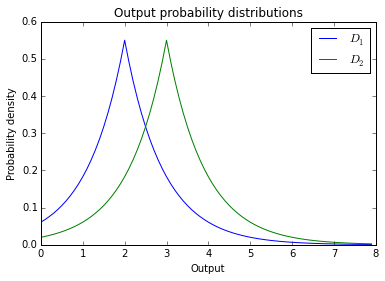

In [5]:
from scipy.stats import laplace
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Sample at output values of between 0 and 8
m = np.arange(0,8,0.1)
epsilon = 1.1 #our value of epsilon, smaller=more private
delta_f = 1
b = delta_f/epsilon
p1 = laplace(loc=2,scale=b)
p2 = laplace(loc=3,scale=b)

#probability distribution of the output of D_1 and D_2, assuming actually are 2 or 3 diabetic people in database.
plt.plot(m,p1.pdf(m),label='$D_1$')
plt.plot(m,p2.pdf(m),label='$D_2$')
plt.legend()
plt.title('Output probability distributions')
plt.xlabel('Output')
plt.ylabel('Probability density')

test(p1,p2,epsilon)

It can be shown that at no point are the probabilities more different than $e^\varepsilon$, where for LaPlace-noise, $\varepsilon = {{\Delta f} \over b}$.
<br /><br /><br /><br /><br /><br /><br />
##What does the $\delta$ mean?

Consider adding a uniform distribution (from -2 to +2 on either side of the actual value), rather than LaPlace noise.

With $\delta=0$ it fails the differential privacy test:

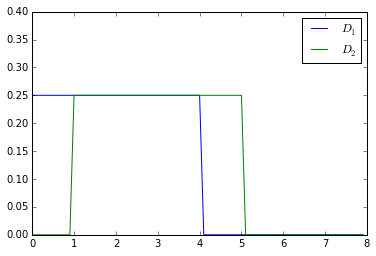

In [6]:
from scipy.stats import uniform

p1 = uniform(loc=2-2,scale=4)
p2 = uniform(loc=3-2,scale=4)
plt.plot(m,p1.pdf(m),label='$D_1$')
plt.plot(m,p2.pdf(m),label='$D_2$')
plt.legend()
plt.ylim([0,0.4])
test(p1,p2,1.1)

- If you queried database $D_1$ (without Fred in), and recieved 0.5, you would know there were between 0 and 2 people with diabetes in the database. 
- If you next queried database $D_2$ (with Fred in), and recieved 4.5, you would know that there are now between 3 and 6. 
- Clearly then there must be more people with diabetes in $D_2$ than in $D_1$, therefore Fred *must* have diabetes. 

With a large enough value of $\delta$ this form of differential privacy would be accepted.

<br /><br /><br /><br /><br /><br /><br />

##Coin flip example continued...

<small>From http://www.cs.cmu.edu/afs/cs/academic/class/15859m-s11/www/lectures/lect0420.pdf</small>

If we assume $\delta=0$ we can write the earlier inequality as:

$e^{-\varepsilon} \leq {{P[M(X)=v]} \over {P[M(X')=v]}} \leq e^{\varepsilon}$

where $X$ and $X'$ are the two databases, with one row changed, where the change is the one with the largest possible effective on the value of $M(X)$.

The coin flip above, the probability of an outcome (e.g. a Yes) given the underlying actual value being True, is ${}^3/_4$. Similarly the probability of the same outcome given the most different actual value (False) is, ${}^1/_4$. Substituting into the above equation: 

$e^{-\varepsilon} \leq {{3/4} \over {1/4}} \leq e^{\varepsilon}$

$3 = e^{\varepsilon}$

$\varepsilon = ln(3)$

So we can say that this algorithm is $(ln\; 3, 0)$-differentially private.
<div class="small">(1.1,0)-DP. I've chosen the earlier example, using LaPlace-noise to have the same value of $\varepsilon$ to aid comparison.</div>

<br /><br /><br /><br /><br /><br /><br />

##Group privacy

In our earlier example of the coin-tossing, we could see that individuals were protected. But what about the group? The organisers might be upset if they found the participants didn't like AI as much as they do.

After the group results are in, we find that 8 of the 10 of us said 'yes'. 

<div class='small'>Quick detour, what is the chance that we all thought "No"? Bit of frequentist stats binomial cdf is $p<3 \times 10^{-5}$</div>

From a privacy perspective, what has combining the data done to our value of $\varepsilon$?

Reminder:

$e^{-\varepsilon} \leq {{P[M(X)=v]} \over {P[M(X')=v]}} \leq e^{\varepsilon}$

- What is the largest change that can happen in the underlying 'database'?
    - In this case it is that 10 of us can switch actual (database) values from 'yes' to 'no'. 
    - If all these actual values are no, the output (of all Nos) has a probability of $(3/4)^{10}$,
    - If all these actual values are yes, the output (of all Nos) has a probability of $(1/4)^{10}$
    
The ratio of these probabilities has a ratio of: $3^{10}$. Substituting into the above inequality and making it an equation:

$e^{\varepsilon} = 3^{10}$

$\varepsilon = ln(3^{10}) = 10\;ln(3)$

Previously, with one person $\varepsilon = ln(3)$

It can be shown that:

>If several rows are of concern ("group privacy"), for query of $(\varepsilon,0)$-DP the same query is only $(k\varepsilon,0)$-DP for $k$ rows.

The larger $k$ indicates that privacy has been degraded.

Obviously to recover the same protection of the group as we had as individuals, one would need to make $\varepsilon$ 10 times smaller. For the coin-tossing, this would rougly mean only telling the truth if you got heads 4 times in a row (the probabilities of a Yes/No would be 15/32 or 17/32 per individual).

What about if we kept asking the database an identical query? We can imagine with enough samples we could start to guess the true answer. With $\delta=0$ the $\varepsilon$ add up as before. Unlike group-privacy, we can also add up the $\delta$s:

>If several queries are made $(\varepsilon_1,\delta_1)$, $(\varepsilon_2,\delta_2)$,... then the $\varepsilon$s and $\delta$s add up, giving $(\sum{\varepsilon_i},\sum{\delta_i})$-DP

If 10 people are added to the database, the change in the probability at a given output becomes much greater.
The privacy loss illustrates this. For one person the privacy loss is bounded by epsilon = 1.1
For 10 people it is bounded by 10 x epsilon = 11.00


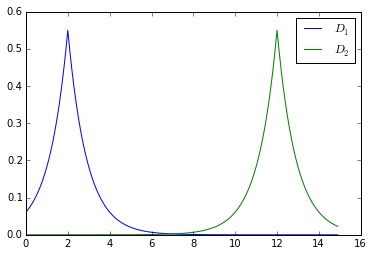

In [6]:
from scipy.stats import laplace
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
m = np.arange(0,15,0.1)
eps = 1.1
delta_f = 1
b = delta_f/eps
p1 = laplace(loc=2,scale=b)
p2 = laplace(loc=12,scale=b)

#probability distribution of the output of D_1 and D_2, assuming actually are 2 or 3 diabetic people in database.
plt.plot(m,p1.pdf(m),label='$D_1$')
plt.plot(m,p2.pdf(m),label='$D_2$')
plt.legend()

print "If 10 people are added to the database, the change in the probability at a given output becomes much greater."
print "The privacy loss illustrates this. For one person the privacy loss is bounded by epsilon = 1.1"
print "For 10 people it is bounded by 10 x epsilon = %0.2f" % (np.log(p2.pdf(15)/p1.pdf(15)))

#Other topics

- Other mechanisms (e.g. the Gaussian Mechanism)
- Counting Queries, Histogram Queries,
- User-centric privacy
- ...
<br /><br /><br /><br /><br /><br /><br />
<br /><br /><br /><br /><br /><br /><br />

###Gaussian Mechanism

The derivation for adding gaussian noise is more complicated (see appendix A of Dwork and Roth), the result of the derivation is a little more complicated. Note also that it includes a non-zero $\delta$:

For a value of $c^2 > 2\;ln(1.25/\delta)$ the Gaussian mechanism with standard deviation $\sigma \geq c \Delta_2f / \varepsilon$ is ($\varepsilon,\delta$)-differentially private.

Using the above example:

p(d1=val) <= p(d2=val) * e^epsilon
0.5: 0.08 <= 0.16 x 3.00 (=0.47) True
1.0: 0.12 <= 0.19 x 3.00 (=0.58) True
1.5: 0.16 <= 0.22 x 3.00 (=0.66) True
2.0: 0.19 <= 0.23 x 3.00 (=0.69) True
2.5: 0.22 <= 0.22 x 3.00 (=0.66) True
3.0: 0.23 <= 0.19 x 3.00 (=0.58) True
3.5: 0.22 <= 0.16 x 3.00 (=0.47) True
4.0: 0.19 <= 0.12 x 3.00 (=0.36) True
4.5: 0.16 <= 0.08 x 3.00 (=0.25) True
5.0: 0.12 <= 0.05 x 3.00 (=0.16) True
5.5: 0.08 <= 0.03 x 3.00 (=0.09) True
6.0: 0.05 <= 0.02 x 3.00 (=0.05) False
6.5: 0.03 <= 0.01 x 3.00 (=0.02) False
7.0: 0.02 <= 0.00 x 3.00 (=0.01) False
7.5: 0.01 <= 0.00 x 3.00 (=0.00) False
8.0: 0.00 <= 0.00 x 3.00 (=0.00) False
8.5: 0.00 <= 0.00 x 3.00 (=0.00) False
9.0: 0.00 <= 0.00 x 3.00 (=0.00) False
9.5: 0.00 <= 0.00 x 3.00 (=0.00) False


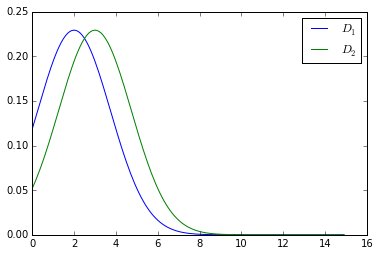

In [7]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Sample at output values of between 0 and 8
m = np.arange(0,15,0.1)
epsilon = 1.1 #our value of epsilon, smaller=more private
delta_f = 1
d = 0.20
c = np.sqrt(2*np.log(1.25/d))
sigma = c * delta_f / epsilon
p1 = norm(loc=2,scale=sigma)
p2 = norm(loc=3,scale=sigma)

#probability distribution of the output of D_1 and D_2, assuming actually are 2 or 3 diabetic people in database.
plt.plot(m,p1.pdf(m),label='$D_1$')
plt.plot(m,p2.pdf(m),label='$D_2$')
plt.legend()

test(p1,p2,epsilon)

So the two distributions have a ratio within $e^\varepsilon$ for most of their distribution, but for small probabilities this doesn't hold. The proportion of outputs where this is allowed to occur is set by the value of $\delta$.

####Counting Queries...

The diabetes example above is an example of this type of query.

Other examples:

> "How many people in our database have a weight between 70kg and 80kg"

The sensitivity of a counting query, $\Delta f = 1$ (as each row can only change the result by a maximum of 1. We therefore simply add Laplace noise with parameter $b = 1/\varepsilon$. If $\varepsilon=1$, then $b=1$.

In [9]:
import numpy as np
weight = np.array([61,71,78,82,85,88,96,99,103,121])
print np.sum((weight>70) & (weight<80))+np.random.laplace(0,1)

-1.95148607598


If 5 counting queries are asked, we need to use $\varepsilon_x = \varepsilon / 5$ for each query to ensure $\varepsilon$ privacy overall. $b = \Delta f / \varepsilon_x = 1/5$

In [10]:
import numpy as np
weight = np.array([61,71,78,82,85,88,96,99,103,121])
print np.sum((weight>70) & (weight<=80))+np.random.laplace(0,5)
print np.sum((weight>80) & (weight<=90))+np.random.laplace(0,5)
print np.sum((weight>90) & (weight<=100))+np.random.laplace(0,5)
print np.sum((weight>100) & (weight<=110))+np.random.laplace(0,5)
print np.sum((weight>110) & (weight<=120))+np.random.laplace(0,5)

2.20241808138
5.48714123244
1.20800379481
11.322149715
-0.045792250465


####Histogram Queries...
Naively one could just ask several separate count queries, as above:

> "How many people in our database have a weight between 70kg and 80kg"
> "How many people in our database have a weight between 81kg and 90kg"
> "How many people in our database have a weight between 91kg and 100kg"

But as these are disjoint cells, we can be more efficient than just a series of seperate counts as the addition of one row can only affect one cell. This means, as long as the cells are disjoint we can just use $\varepsilon$, rather than $\varepsilon / N$

####Report noisy max - skip

Query:
> Which disease is the most common in the database?

We could solve this by just asking for a count of the $m$ diseases, and find the one with the largest value. This has a privacy cost of $m\varepsilon$, and so potentially is quite likely to give us the wrong answer.

Report noisy max is a DP method for reporting the most common with only $Lap(1/\varepsilon)$ added to each count. Note that this is independent of $m$.

The proof is a little complicated, but goes roughly like this.

The counts of the database $D'$ are held in a vector $c'$ (for some reason the proof in the book make the primed values the state without new item $a$.

Once $a$ is added, we have new counts in database $D$: $c$. Each value $c_i$ is either equal to or one greater than $c'_i$.

We take a single sample $r_i$ from the laplace distribution for all but the last count, to find for each count the `output': $c_i + r_i$.

We find the value $r^*$ for the last noise-sample $r_m$ such that the last count plus its noise sample is greater than any other output. I.e. so that $c_m + r^* > c_i + r_i \;\;\;\forall i<m$ 

We know that $c_m$ is either $c_m'$ or $c_m'+1$ so $c_m'+1 \geq c_m$, similarly we know that $c_i \geq c_i'$. We can therefore write the earlier inequality as:

$c_m' + (r^* + 1) > c_i' + r_i$

So for both the old and new databases we have expressions:

New database: $c_m + r^* > c_i + r_i$
and
Old database: $c_m' + (r^* + 1) > c_i' + r_i$

The old count for the last value plus its special noise value plus one, is always greater than any other old count plus a noise value.

So we now need to consider what happens for particular values of noise for $r_m$. If $r_m \geq r^* + 1$ then the mth count will be the greatest, in the new database. This needs to be compared to the likelihood of it being the greatest in the old database $r_m \geq r^*$.

From the derivation of the LaPlace mechanism we know that if $r_m$ is sampled from $Lap(1/\varepsilon)$ the difference in probability will be:

$P[r_m \geq 1 + r^*] \geq e^\varepsilon P[r_m \geq r^*]$

To remind ourselves, here we're specifying a sensitivity of 1 (by the addition of one to the inequality), so the Laplace shape parameter will be just $1/\varepsilon$.

To finish.

Data of this format includes things such as genetic data, etc, with large-dimensionality and potentially small numbers of people in the sample. A set of assumptions have been made above (about the lack of correlations between parameters etc), but as an illustration of the risk it suffices.

Other topics to consider in this field:

- sparse binary vectors
- fingerprinting
- human genome fingerprinting
- what segments of the genome are good for 'barcoding' people.
- Personal Genome Project
- Parity Check
- SECURE MULTIPARTY COMPUTATION
- "How much is enough, choosing $\varepsilon$ for diff priv" - Lee & Clifton

##User-centric Privacy Model

###Applying to individual collections of data

Rather than a database of 


To rephrase the above to our problem: What effect does adding a data point $x$ have to the summary value? We need to know the sensitivity of the algorithm. Questions come up about normalisation (to normalise we need to know the values of the variables!).



And a list of hints/rules-of-thumb (again from Dwork & Roth, actually most of this document is based on their book or wikipedia, which is also based on their book. Maybe just go read the book!).

 - Data cannot be fully anonymised and remain useful.
 - Reidentification of anonymised records is not the only risk.
 - Queries over large sets are not protective.
 - Query auditing is problematic (e.g. refusing a query could be disclosive, computationally infeasible).
 - Summary statistics are not safe.
 - "Ordinary facts" are not ok (e.g. shopping habits - give clues around health, household, religion, etc).
 - Cancel privacy for "just a few" people, for "greater good" (outliers, etc): A possible moral standpoint, but which is usually (reasonably) rejected.

#Supporting Mathematics

###Additive Chernoff Bound

$P[S>\mu+\epsilon] \leq e^{-2n\epsilon^2}$

For a set of $n$ random variables:
S = actual mean, $\mu$ = expected mean

In [63]:
from scipy.stats import uniform,norm
n = 10
epsilon = 0.2
S = 0
its = 1000
p = 0
for it in range(its):
  #  X = uniform.rvs(size=n,loc=-.5)
    X = norm.rvs(size=n)
    mu = np.mean(X)
    if S>mu+epsilon:
        p = p + (1./its)
print "%0.4f <= %0.4f" % (p,np.exp(-2*n*epsilon**2))

0.2810 <= 0.4493


Other theorems:

- Multiplicative Chernoff Bound
- Azuma's Inequality
- Stirlings Approximation (n!)

###Azuma's Inequality

We have a set of values: $A_1...$
We sample $m$ of these: $X_1, X_2...X_m$

$c_i$ is the maximum effect the changing of one of the $X$s can have on the output of a function $f(X_1,X_2,...X_m)$.

$P \left[f(X_1...X_m) \geq E[f]+t \right] \leq exp \left( {{2t^2}\over{\sum_{i=1}^m c_i^2}} \right)$

In [93]:
A = uniform.rvs(size=10)
import numpy.random as r
m = 7
def f(X):
    return sum(X)
c = 1.
t = 3.
p = 0
E = m * 0.5
for it in range(100):
    X = r.choice(A,size=m)
    if f(X)>=E+t:
        p = p + 1./100

print "%0.2f <= %0.2f" % (p,np.exp(2.*t**2. / m)) #sum c^2 = m


0.00 <= 13.08


In [67]:
A

array([ 0.46602677,  0.16269559,  0.56855119,  0.91228945,  0.86081923,
        0.35439414,  0.4583345 ,  0.31691735,  0.28761812,  0.35483774])